# Accessing 3D Thermistor Array as JSON via OOI RESTful API
Here are some basic instructions to get started using the OOI M2M Web Services to request TMPSF (3D Thermistor Array) data

## Getting Started
* Create a user account on ooinet.oceanobservatories.org, or use the CILogon button with an academic or Google account.
* Log in
* Navigate to the drop down menu screen in the top-right corner menu
* Click on the "User Profile" element of the drop down.
* Copy and save the following data from the user profile: API Username and API Token. The API Username is similar to “OOIAPI-QTULEV9STCAS55”. The API Token is similar to “YXP2Q2W4SOP”.

In [1]:
import requests
import datetime
import matplotlib.pyplot as plt

In [2]:
USERNAME ='YOUR-API-USER'
TOKEN= 'YOUR-API-TOKEN'
DATA_API_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

In this example we will request information and data from the Cabled Axial Seamount ASHES Vent Field (RS03ASHS) - Medium-Power JBox (MJ03B) - Diffuse Vent Fluid 3-D Temperature Array (07-TMPSFA301) sensor.
Platform = RS03ASHS
Node = MJ03B
Instrument = 07-TMPSFA301
Delivery Method = streamed
Stream Name = tmpsf_sample
Platform, Node, Instrument, Delivery Method and Stream Name can be found in the OOI data catalog. These are all elements necessary to build a data request URL, which we will do in the next step. For this example, we will request all data between 2017-09-04T17:54:58.050Z and 2017-11-04T23:54:58.050Z.

In [3]:
data_request_url = DATA_API_BASE_URL+\
                    'RS03ASHS/'+\
                    'MJ03B/'+\
                    '07-TMPSFA301/'+\
                    'streamed/'+\
                    'tmpsf_sample?'+\
                    'beginDT=2017-09-04T17:54:58.050Z&'+\
                    'endDT=2017-09-11T23:54:58.050Z&'+\
                    'limit=1000'

Next, let's send the data request. Notice the addition of `limit=1000` in the data request URL above. This tells the sustem that we want the data to be returned as instantaneous JSON response, instead of asynchronously delivered as NetCDF files onto the THREDDS server.

In [4]:
r = requests.get(data_request_url, auth=(USERNAME, TOKEN))
data = r.json()

All the data points are now contained in the `data` variable object. Since we aren't dealing with a NetCDF file, we won't be using the xarray package, and will need to manually convert the ntp seconds to date time. Let's set up a function to do this.

In [5]:
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()

def ntp_seconds_to_datetime(ntp_seconds):
    return datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)

Now we are ready to loop through the json response and extract the time stamp for each data point, as well as the temperature value from the 4th thermistor, for example.

In [6]:
time = []
temperature04 = []

for i in range(len(data)):
    time.append(ntp_seconds_to_datetime(data[i]['time']))
    temperature04.append(data[i]['temperature04'])

Now we are ready to plot the data.

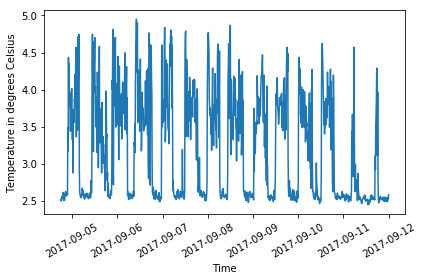

In [7]:
plt.plot(time, temperature04)
plt.ylabel('Temperature in degrees Celsius')
plt.xlabel('Time')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()